<a href="https://colab.research.google.com/github/alteregoxiv/stockpred/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PREDICTION USING LSTM(KERAS)**


# **Importing necessary Libraries**

In [606]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Training Data Set**

In [607]:
traindata = pd.read_csv("./AMZNtrain.csv")
traindata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


# **Testing Data Set**

In [608]:
testdata = pd.read_csv("./AMZNtest.csv")
testdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


# **Shapes of both data sets(Train , Test)**

In [609]:
traindata.shape , testdata.shape

((1258, 7), (21, 7))

# **Concatenating Datasers and Sorting**

In [610]:
data = pd.concat([traindata , testdata] , axis=0 , ignore_index=True)
data.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

In [611]:
for i in range(len(data)):
  date = data["Date"][i]
  d = date.split("-")
  s = str(d[0]) + str(d[1]) + str(d[2])
  data["Date"][i] = s
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Open,High,Low,Close,Adj Close,Volume
0,20140102,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,20140103,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,20140106,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,20140107,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,20140108,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [612]:
data = data.sort_index(ascending=True , axis=0)
data.head

<bound method NDFrame.head of           Date         Open         High  ...        Close    Adj Close    Volume
0     20140102   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     20140103   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     20140106   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     20140107   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     20140108   398.470001   403.000000  ...   401.920013   401.920013   2316500
...        ...          ...          ...  ...          ...          ...       ...
1274  20190125  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  20190128  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  20190129  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  20190130  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  20190131  1692.849976  1736.410034  ...  1718.729980  1718.729

# **Saving the DataFrame**

In [613]:
data.to_csv(r'./AMZNTotalData.csv' , index=False)

In [614]:
newdata = pd.read_csv("./AMZNTotalData.csv")
newdata.head

<bound method NDFrame.head of           Date         Open         High  ...        Close    Adj Close    Volume
0     20140102   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     20140103   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     20140106   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     20140107   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     20140108   398.470001   403.000000  ...   401.920013   401.920013   2316500
...        ...          ...          ...  ...          ...          ...       ...
1274  20190125  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  20190128  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  20190129  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  20190130  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  20190131  1692.849976  1736.410034  ...  1718.729980  1718.729

# **Test Train Split from the concatenated Data Set**

In [615]:
limit = np.random.rand((len(newdata)))<0.7
train = newdata[limit]
test = newdata[~limit]
train.shape , test.shape

((917, 7), (362, 7))

In [616]:
newtrain = train[['Adj Close']]
newtest = test[['Adj Close']]

newtrain.shape , newtest.shape

((917, 1), (362, 1))

# **Scaling the Data**

In [617]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

newtrain = sc.fit_transform(newtrain)
newtest = sc.fit_transform(newtest)

newtrain = np.reshape(newtrain , (-1 , 1))
newtest = np.reshape(newtest , (-1 , 1))

# **Preparing the Final data using timestep for LSTM**

In [618]:
def final_data(data , timestep):
  xdata , ydata = [] , []
  l = len(data)
  for i in range(l-timestep):
    a = data[i : i+timestep , 0]
    xdata.append(a)
    ydata.append(data[i+timestep , 0])
  return np.array(xdata) , np.array(ydata)



timestep = 60
xtrain  , ytrain = final_data(newtrain , timestep)
xtest , ytest = final_data(newtest , timestep)

In [619]:
xtrain = xtrain.reshape(xtrain.shape[0] , xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0] , xtest.shape[1] , 1)
#xtrain.shape
#print(xtrain)

# **Preparing Model**

In [620]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [621]:
model = Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape=(60 , 1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer='adam')

In [622]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_69 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_70 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# **Fitting**

In [623]:
model.fit(xtrain , ytrain , validation_data=(xtest , ytest) , epochs=200 , batch_size=64 , verbose=1)

Epoch 1/200
14/14 [==============================] - 10s 259ms/step - loss: 0.0493 - val_loss: 0.0188
Epoch 2/200
14/14 [==============================] - 2s 147ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 3/200
14/14 [==============================] - 2s 148ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 4/200
14/14 [==============================] - 2s 153ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 5/200
14/14 [==============================] - 2s 151ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 6/200
14/14 [==============================] - 2s 149ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 7/200
14/14 [==============================] - 2s 149ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 8/200
14/14 [==============================] - 2s 148ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 9/200
14/14 [==============================] - 2s 146ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 10/200
14/14 [==============================] - 2s 146ms/step - loss: 9.9017e-04 - v

In [624]:
trainpredict = model.predict(xtrain)
testpredict = model.predict(xtest)

In [625]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [626]:
sqrt(mean_squared_error(ytrain , trainpredict))

0.018143424392605353

In [627]:
sqrt(mean_squared_error(ytest , testpredict))

0.023893970540077344

In [628]:
# x_train = sc.inverse_transform(xtrain)
y_train = sc.inverse_transform(np.reshape(ytrain , (-1 , 1)))

In [629]:
# x_test = sc.inverse_transform(xtest)
y_test = sc.inverse_transform(np.reshape(ytest , (-1 , 1)))

In [630]:
train_predict = sc.inverse_transform(trainpredict)
test_predict = sc.inverse_transform(testpredict)

In [631]:
sqrt(mean_squared_error(y_train , train_predict))

31.13502246839112

In [632]:
sqrt(mean_squared_error(y_test , test_predict))

41.003248577568655

# **Plotting**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

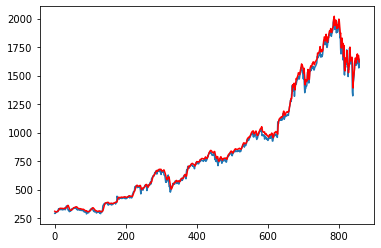

In [633]:
from google.colab import files

plt.plot(y_train)
plt.plot(train_predict , c='red')
plt.savefig("trainprediction.png")

files.download("trainprediction.png")

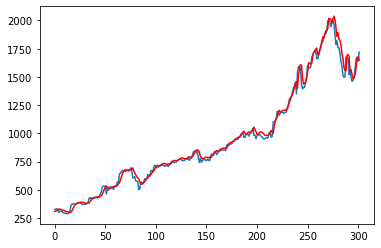

In [634]:
plt.plot(y_test)
plt.plot(test_predict , c='red')